<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/Panel_regression_includin_covid_years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving merged_df_3.csv to merged_df_3.csv


In [11]:
import pandas as pd
df = pd.read_csv('merged_df_3.csv')
df.head()

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,2007-01-01,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN
1,02 Aragón,2007-01-01,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",2007-01-01,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",2007-01-01,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN
4,05 Canarias,2007-01-01,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN


In [12]:
df['Monthly_number_of_tourists_millions'] = df['Monthly_number_of_tourists'] / 1000000
df['Total_mixed_waste_millions'] = df['Total_mixed_waste'] / 1000000
df['Yearly_tourist_numbers_millions'] = df['Yearly_tourist_numbers'] / 1000000

In [13]:
#filter out nacional and otras comunidades autonomas
#filter dataframe to start in 2015
#do one panel regression with yearly data
#do one with quartelry data for top 6 and otras comunidades and nacional?

In [27]:
df['Period'] = pd.to_datetime(df['Period'])
df = df[df['Period'] >= '2015-01-01'].reset_index(drop=True)
df_quarterly = df[df['Period'].dt.month.isin([1, 4, 7, 10])]
df_yearly = df[df['Period'].dt.month == 1]


In [32]:
filtered_df_only_AC = df[~df['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_quarterly_only_AC = df_quarterly[~df_quarterly['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_yearly_only_AC = df_yearly[~df_yearly['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_top_six = df[df['Autonomous_community'].isin(['01 Andalucía', '04 Balears, Illes', '05 Canarias', '09 Cataluña', '10 Comunitat Valenciana', '13 Madrid, Comunidad de'])]
filtered_df_top_six_quarterly = df_quarterly[df_quarterly['Autonomous_community'].isin(['01 Andalucía', '04 Balears, Illes', '05 Canarias', '09 Cataluña', '10 Comunitat Valenciana', '13 Madrid, Comunidad de'])]

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [23]:
summary=filtered_df_only_AC[['Monthly_number_of_tourists_millions','Yearly_tourist_numbers_millions','total_waste_capita','HPI','Unemployment_rate', 'GDP_per_capita' ]].describe().round(2)

summary = summary.rename(
    columns={
        'Monthly_number_of_tourists_millions': 'Monthly number of tourists for top 6 autonomous communities (millions)',
        'Yearly_tourist_numbers_millions' : 'Yearly number of tourists (millions)',
        'total_waste_capita': 'Total urban waste collected per capita (kg)',
        'HPI': 'Housing Price Index',
        'Unemployment_rate': 'Unemployment rate',
        'GDP_per_capita': 'GDP per capita (€)'
    }
)
summary=summary.T #rows become columns and vice versa
summary

,count,mean,std,min,25%,50%,75%,max
Monthly number of tourists for top 6 autonomous communities (millions),660.0,0.87,0.59,0.00,0.44,0.81,1.18,2.57
Yearly number of tourists (millions),136.0,3.90,5.39,0.05,0.30,1.00,6.42,19.38
Total urban waste collected per capita (kg),136.0,480.12,79.71,354.10,432.30,458.55,510.68,811.90
Housing Price Index,663.0,119.59,17.36,95.42,104.35,115.91,131.07,178.65
Unemployment rate,595.0,14.04,4.78,5.61,10.48,12.86,16.69,29.70
GDP per capita (€),544.0,26001.24,5418.63,17239.00,21796.50,24792.50,29716.00,42198.00


In [22]:
summary=filtered_df_quarterly_only_AC[['Monthly_number_of_tourists_millions','Yearly_tourist_numbers_millions','total_waste_capita','HPI','Unemployment_rate', 'GDP_per_capita' ]].describe().round(2)

summary = summary.rename(
    columns={
        'Monthly_number_of_tourists_millions': 'Quarterly number of tourists for top 6 autonomous communities (millions)',
        'Yearly_tourist_numbers_millions' : 'Yearly number of tourists (millions)',
        'total_waste_capita': 'Total urban waste collected per capita (kg)',
        'HPI': 'Housing Price Index',
        'Unemployment_rate': 'Unemployment rate',
        'GDP_per_capita': 'GDP per capita (€)'
    }
)
summary=summary.T #rows become columns and vice versa
summary

,count,mean,std,min,25%,50%,75%,max
Quarterly number of tourists for top 6 autonomous communities (millions),222.0,0.91,0.59,0.00,0.53,0.87,1.21,2.56
Yearly number of tourists (millions),136.0,3.90,5.39,0.05,0.30,1.00,6.42,19.38
Total urban waste collected per capita (kg),136.0,480.12,79.71,354.10,432.30,458.55,510.68,811.90
Housing Price Index,663.0,119.59,17.36,95.42,104.35,115.91,131.07,178.65
Unemployment rate,595.0,14.04,4.78,5.61,10.48,12.86,16.69,29.70
GDP per capita (€),544.0,26001.24,5418.63,17239.00,21796.50,24792.50,29716.00,42198.00


Panel Regression with Unbalanced Panels:

Most panel regression techniques, including Fixed Effects and Random Effects, can handle unbalanced panels. They adjust their calculations to accommodate the varying counts.
However, it's crucial to understand that unbalanced panels might introduce bias if the missingness is not random (e.g., if certain types of individuals are more likely to have missing data).
Potential Bias: If the reason for the different counts in your variables is related to the outcome variable or other predictors, it could lead to biased estimates. Consider investigating the reasons for missing data and whether they introduce systematic bias.

In [24]:
unique_communities = df['Autonomous_community'].unique()

# Print the unique communities
print(unique_communities)

['01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La' 'Nacional' 'Otras Comunidades Autónomas']


In [30]:
summary=filtered_df_yearly_only_AC[['Yearly_tourist_numbers_millions','total_waste_capita','HPI','Unemployment_rate', 'GDP_per_capita' ]].describe().round(2)

summary = summary.rename(
    columns={
        'Yearly_tourist_numbers_millions' : 'Yearly number of tourists (millions)',
        'total_waste_capita': 'Total urban waste collected per capita (kg)',
        'HPI': 'Housing Price Index',
        'Unemployment_rate': 'Unemployment rate',
        'GDP_per_capita': 'GDP per capita (€)'
    }
)
summary=summary.T #rows become columns and vice versa
summary

,count,mean,std,min,25%,50%,75%,max
Yearly number of tourists (millions),136.0,3.90,5.39,0.05,0.30,1.00,6.42,19.38
Total urban waste collected per capita (kg),136.0,480.12,79.71,354.10,432.30,458.55,510.68,811.90
Housing Price Index,170.0,117.76,16.96,95.42,103.82,114.29,129.42,168.78
Unemployment rate,153.0,15.08,4.89,7.53,11.33,14.07,18.11,29.70
GDP per capita (€),136.0,26001.24,5433.66,17239.00,21796.50,24792.50,29716.00,42198.00


In [36]:
summary=filtered_df_top_six_quarterly[['Monthly_number_of_tourists_millions','total_waste_capita','HPI','Unemployment_rate', 'GDP_per_capita' ]].describe().round(2)

summary = summary.rename(
    columns={
        'Monthly_number_of_tourists_millions': 'Quarterly number of tourists for top 6 autonomous communities (millions)',
        'total_waste_capita': 'Total urban waste collected per capita (kg)',
        'HPI': 'Housing Price Index',
        'Unemployment_rate': 'Unemployment rate',
        'GDP_per_capita': 'GDP per capita (€)'
    }
)
summary=summary.T #rows become columns and vice versa
summary

,count,mean,std,min,25%,50%,75%,max
Quarterly number of tourists for top 6 autonomous communities (millions),222.0,0.91,0.59,0.00,0.53,0.87,1.21,2.56
Total urban waste collected per capita (kg),48.0,525.19,109.52,363.80,455.80,507.10,573.32,811.90
Housing Price Index,234.0,127.53,20.68,95.42,109.16,124.89,142.64,178.65
Unemployment rate,210.0,15.72,5.24,5.61,11.66,14.62,19.14,29.70
GDP per capita (€),192.0,26466.96,6415.52,17239.00,21077.50,25271.50,31072.75,42198.00


In [ ]:
#waste is only yearly thats why theres so few counts

In [ ]:
sns.jointplot(data=filtered_df_only_AC, # plot a scatterplot with a regression line and two histograms
                x='unemployment', # set the x axis to be the years of schooling
                y='r_votes', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Unemployment') # add a label to the x axis
plt.ylabel('Republican voteshare') # add a label to the y axis

In [ ]:
# assumptions - multicollinearity
sns.heatmap(regression_df[['Unemployment_rate','HPI','Yearly_tourist_numbers_millions','Total_mixed_waste_millions', 'total_waste_capita', 'GDP_per_capita']].corr(), # plot a correlation matrix
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

In [ ]:
#multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i)
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')

        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)

        print('Max VIF:', vif_df.VIF.max())

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

ind_vars=['unemployment','r_votes','population']

vif = drop_column_using_vif_(df_c[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

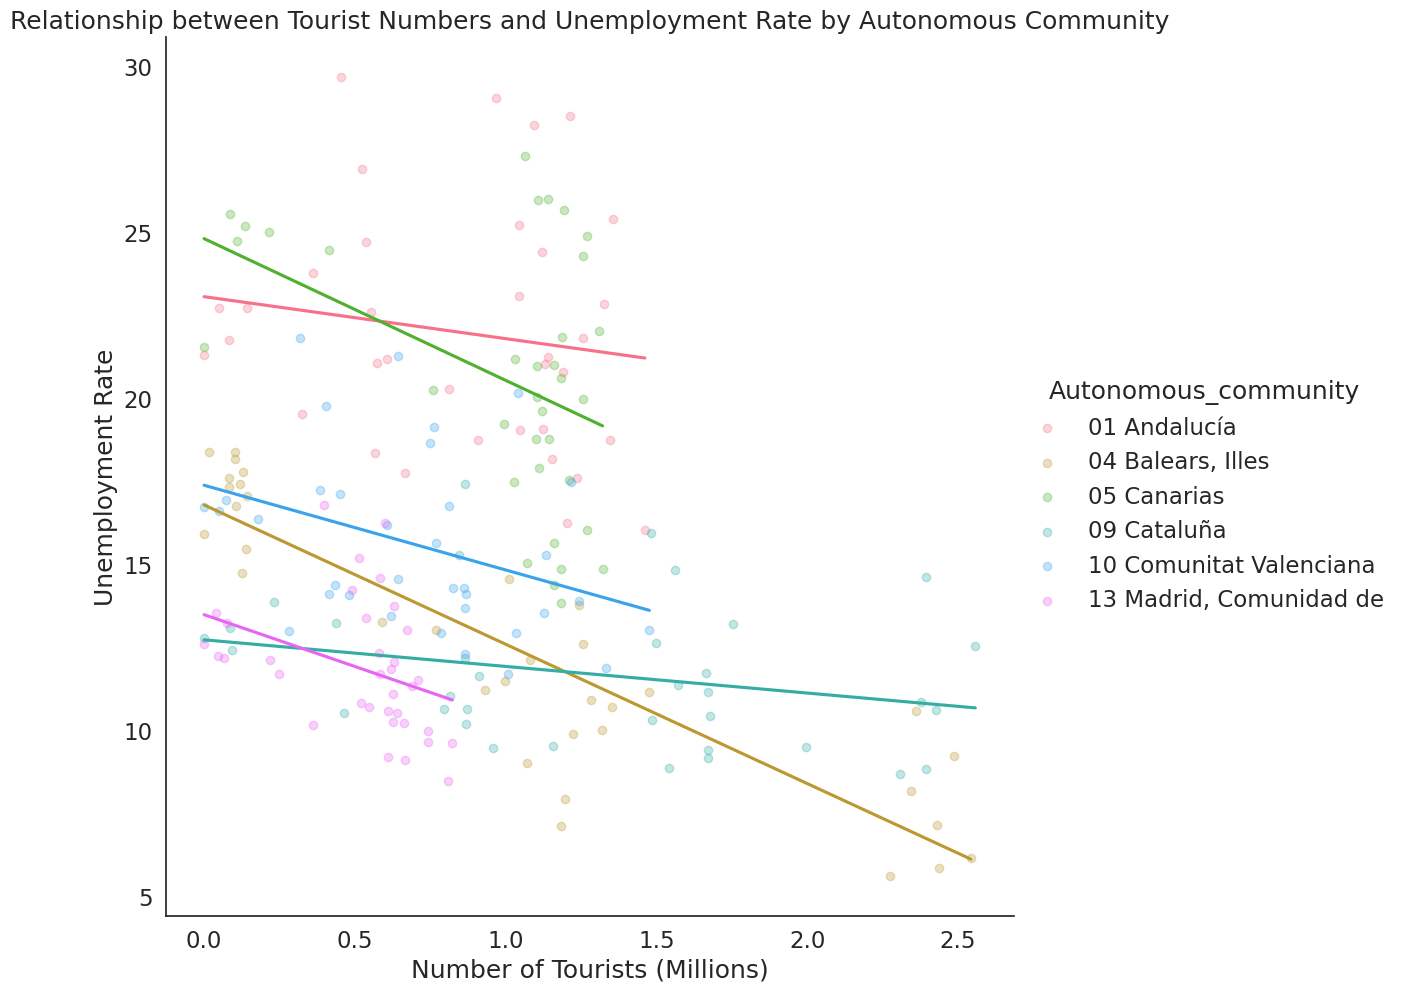

In [44]:
sns.lmplot(data=filtered_df_top_six_quarterly,
           x='Monthly_number_of_tourists_millions',
           y='Unemployment_rate',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Unemployment Rate')
plt.title('Relationship between Tourist Numbers and Unemployment Rate by Autonomous Community')

plt.show()

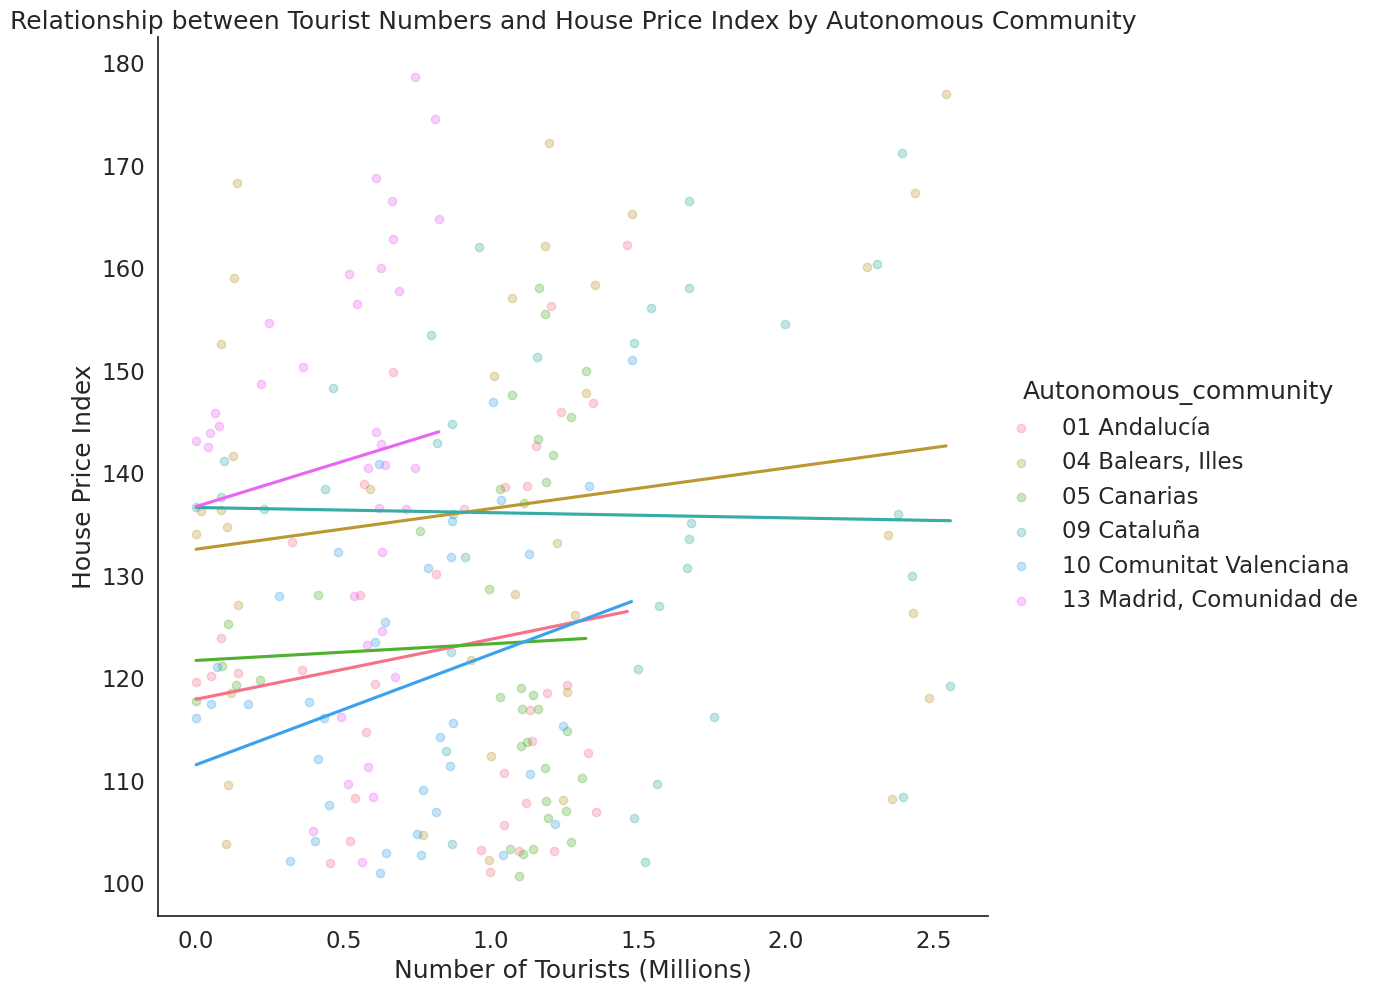

In [45]:
sns.lmplot(data=filtered_df_top_six_quarterly,
           x='Monthly_number_of_tourists_millions',
           y='HPI',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('House Price Index')
plt.title('Relationship between Tourist Numbers and House Price Index by Autonomous Community')

plt.show()

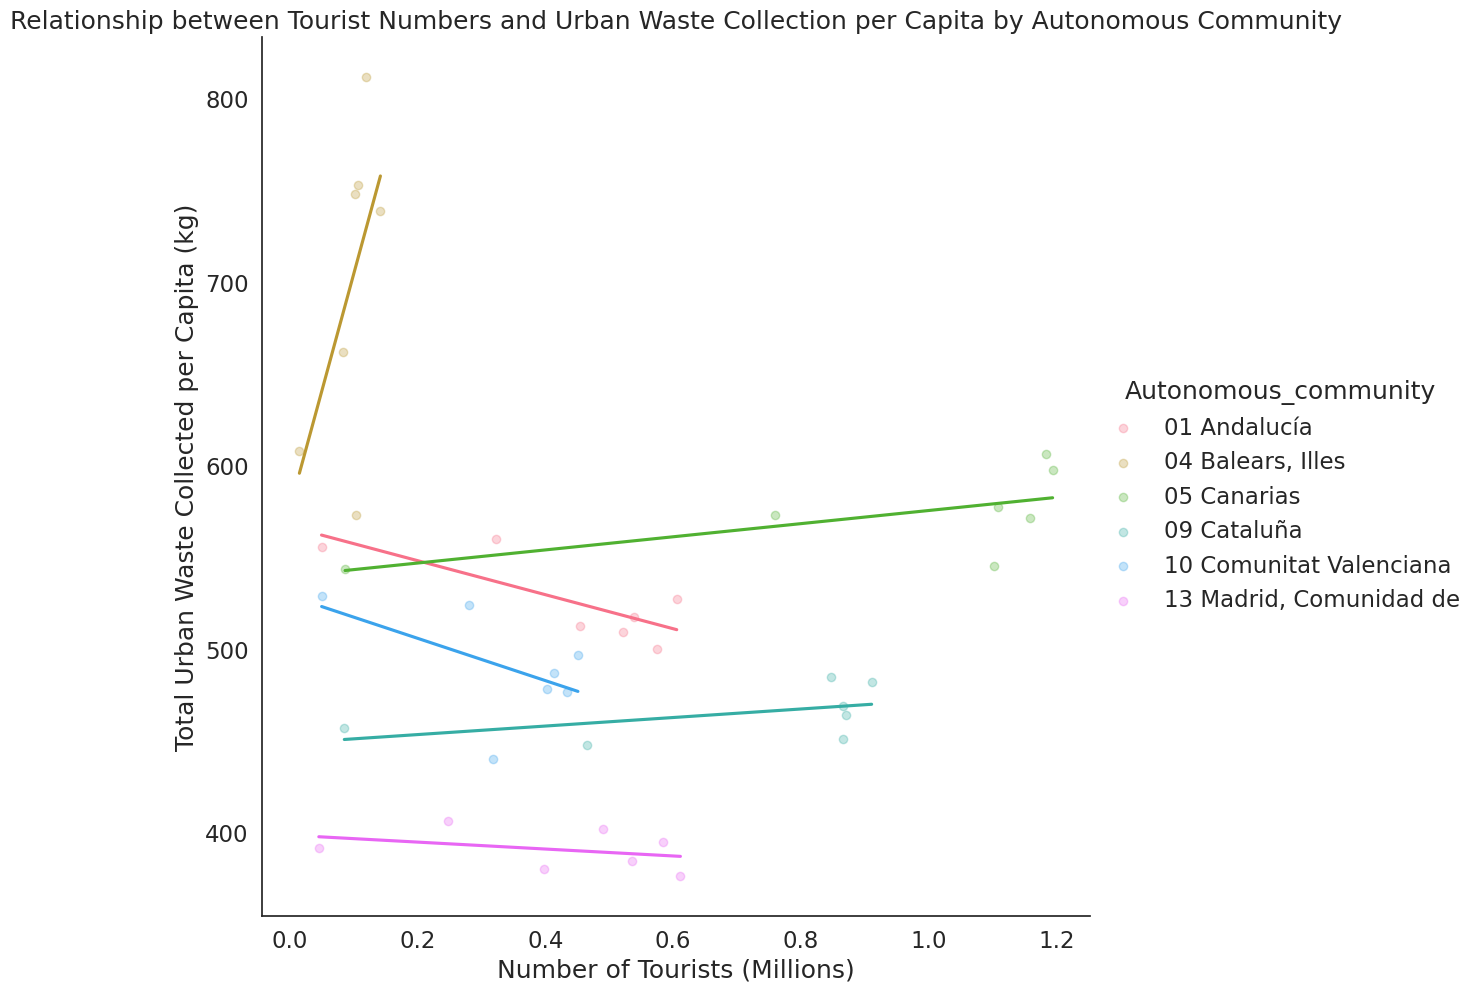

In [51]:
sns.lmplot(data=filtered_df_top_six_quarterly,
           x='Monthly_number_of_tourists_millions',
           y='total_waste_capita',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Total Urban Waste Collected per Capita (kg)')
plt.title('Relationship between Tourist Numbers and Urban Waste Collection per Capita by Autonomous Community')

plt.show()

In [ ]:
#filter out nacional and otras comunidades autonomas
#do one panel regression with yearly data
#do one with quartelry data for top 6 and otras comunidades and nacional?

In [ ]:
!pip install linearmodels
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df_c=df_c.set_index(['county_fips','year']) # set the index to the county fips code and the year
panel = PanelOLS.from_formula('r_votes ~ 1  + population + unemployment  + EntityEffects',df_c).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True)) # print the model formatted as a regression table